In [1]:
import numpy as np

import heapq

import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential, load_model

from keras.layers.core import Dense, Activation

from keras.layers import LSTM

import pickle

from tensorflow.keras.optimizers import RMSprop

In [2]:
# path = './data.txt'
# text = open(path,'r', encoding="utf8").read().lower()
# print('length of the corpus is: :', len(text))
# text[:100]

text = "aaa bbb ccc ddd eee fff ggg hhh iii jjj kkk lll mmm nnn ooo ppp qqq rrr sss ttt uuu vvv www xxx yyy zzz"
text = "aaa bbb ccc ddd eee fff ggg hhh iii jjj kkk lll mmm nnn"

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
words[:50]

['aaa',
 'bbb',
 'ccc',
 'ddd',
 'eee',
 'fff',
 'ggg',
 'hhh',
 'iii',
 'jjj',
 'kkk',
 'lll',
 'mmm',
 'nnn']

In [19]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

unique_word_index

{'aaa': 0,
 'bbb': 1,
 'ccc': 2,
 'ddd': 3,
 'eee': 4,
 'fff': 5,
 'ggg': 6,
 'hhh': 7,
 'iii': 8,
 'jjj': 9,
 'kkk': 10,
 'lll': 11,
 'mmm': 12,
 'nnn': 13}

In [20]:
LENGTH_WORD = 3
next_words = []
prev_words = []
for j in range(len(words) - LENGTH_WORD):
     prev_words.append(words[j:j + LENGTH_WORD])
     next_words.append(words[j + LENGTH_WORD])
print(prev_words[0])
print(next_words[0])

['aaa', 'bbb', 'ccc']
ddd


In [6]:
np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)

array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False]],

       [[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False, False, False, False, Fa

In [7]:
X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
   for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
   Y[i, unique_word_index[next_words[i]]] = 1

In [21]:
X

array([[[ True, False, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False]],

       [[False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False]],

       [[False, False,  True, False, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False],
        [False, False, False, False,  True, False, False, Fa

In [22]:
Y

array([[False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        F

In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(LENGTH_WORD, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [24]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 0.2717 - accuracy: 0.9000 - val_loss: 9.1774 - val_accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 22ms/step - loss: 0.6162 - accuracy: 0.7000 - val_loss: 7.5129 - val_accuracy: 0.0000e+00


In [10]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

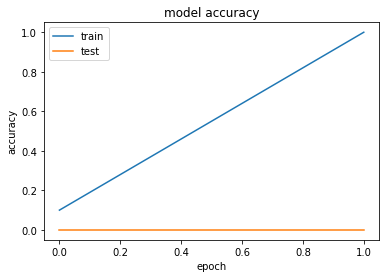

In [11]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

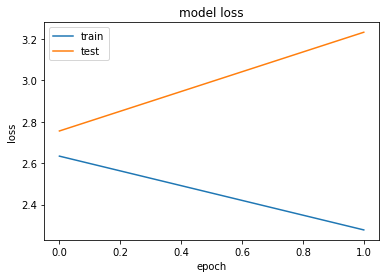

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [13]:
def prepare_input(text):
    x = np.zeros((1, LENGTH_WORD, len(unique_words)))
    for t, word in enumerate(tokenizer.tokenize(text)[:LENGTH_WORD]):
#         print(word, t)
        if unique_word_index.get(word) != None:
            x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [14]:
np.zeros((1, 5, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [15]:
def sample(preds, top_n=3):
   preds = np.asarray(preds).astype('float64')
   preds = np.log(preds)
   exp_preds = np.exp(preds)
   preds = exp_preds / np.sum(exp_preds)
   return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [16]:
def predict_completions(text, n=3):
    print(f"text: {text}")
    x = prepare_input(text)

    preds = model.predict(x, verbose=0)[0]
    
#     print(f"preds: {preds}")

    next_indices = sample(preds, n)
    
#     print(f"next_indices: {next_indices}")

    next_tokens = tokenizer.tokenize(text)[1:]

    print(f"next_tokens: {next_tokens}")

    return [unique_words[idx] for idx in next_indices]

In [17]:
# quotes = [
#     "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
#     "That which does not kill us makes us stronger.",
#     "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
#     "And those who were seen dancing were thought to be insane by those who could not hear the music.",
#     "It is hard enough to remember my opinions, without also remembering my reasons for them!"
# ]

quotes = [
    "aaa bbb ccc ddd eeee",
    "hhh iii jjj kkk lll mmm",
    "aaa bbb ccc ddd xxx"
]

In [18]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

aaa bbb ccc ddd eeee
text: aaa bbb ccc ddd eeee
next_tokens: ['bbb', 'ccc', 'ddd', 'eeee']
['ddd', 'eee', 'fff', 'iii', 'ggg']

hhh iii jjj kkk lll mmm
text: hhh iii jjj kkk lll mmm
next_tokens: ['iii', 'jjj', 'kkk', 'lll', 'mmm']
['kkk', 'lll', 'jjj', 'mmm', 'iii']

aaa bbb ccc ddd xxx
text: aaa bbb ccc ddd xxx
next_tokens: ['bbb', 'ccc', 'ddd', 'xxx']
['ddd', 'eee', 'fff', 'iii', 'ggg']

